# Filtre de Butterworth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, lfilter, unit_impulse

## 1. Le type de filtre : 
- Le type de ce filtre est un **filtre passe-bande (PB)**. 

Un filtre passe-bande est un filtre qui laisse passer les fréquences entre deux fréquences de coupure spécifiques, en l'occurrence ici entre 1 KHz et 3 KHz. Il bloque ou atténue les fréquences en dehors de cette plage.


## 2. Calcul des fréquences de coupure normalisées du filtre.

- Les fréquences de coupure normalisées du filtre sont calculées en divisant chaque fréquence de coupure par la moitié de la fréquence d'échantillonnage. 

$$ \text{Fréquence de coupure normalisée} = \frac{\text{Fréquence de coupure}}{\frac{\text{Fréquence d'échantillonnage}}{2}} $$
 
- **C'est quoi la valeur ${\frac{\textbf{Fréquence d'échantillonnage}}{\textbf{2}}}$ ?** : 

La valeur **${\frac{\text{Fréquence d'échantillonnage}}{2}}$**  correspond à la fréquence maximale $ f_{\text{max}} $ selon le **théorème de Shannon**. Le théorème de Shannon stipule que la fréquence d'échantillonnage $ f_e $ doit être au moins le double de la fréquence maximale, c'est-à-dire 

$$ f_e \geq 2 f_{\text{max}} $$

Avec $f_{\text{max}}$ est appelée fréquence de coupure ou fréquence de Nyquist.

En prenant la borne supérieure de cette inégalité, on obtient :
 $$ f_{\text{max}} = \frac{f_e}{2} $$

Ainsi, on peut conclure que $\frac{f_e}{2}$ est simplement la fréquence maximale.

In [2]:
# % Définition des paramètres
fc1 = 1000  # fréquence de coupure basse en Hz
fc2 = 3000  # fréquence de coupure haute en Hz
fe = 8000  # fréquence d'échantillonnage en Hz
ordre = 4  # ordre du filtre

#Les fréquences de coupure normalisées
fc1_normalisée = fc1 / (fe / 2)
fc2_normalisée = fc2 / (fe / 2)

print("La fréquence de coupure fc1 normalisée: ", fc1_normalisée)
print("La fréquence de coupure fc2 normalisée: ", fc2_normalisée)

La fréquence de coupure fc1 normalisée:  0.25
La fréquence de coupure fc2 normalisée:  0.75


## 3. Les coefficients ai et bi du filtre RII choisi.

La conception d'un filtre Butterworth passe-bande commence par la définition de la fonction de transfert analogique d'un filtre passe-bas d'ordre 1, qui est donnée par : $$h(s) = \frac{1}{1+s}$$ En utilisant un tableau de polynômes, on peut déduire la fonction de transfert analogique d'un filtre passe-bas d'ordre 4.

![Tableau de Fonction de Transfert](img/Tableau_Fonction_transfert.png)




Ensuite, une transformation de variable est effectuée pour convertir le filtre passe-bas en filtre passe-bande. Cette transformation est définie par : $$s = \frac{1}{B}\left(\frac{s}{w_0} + \frac{w_0}{s}\right)$$

où $B = W_{\text{high}} - W_{\text{low}}$ est la largeur de bande, $w_0 = \sqrt{W_{\text{high}} \cdot W_{\text{low}}}$ est la fréquence centrale du filtre, et $W = 2\pi f$ est la pulsation (avec $f$ comme fréquence).

Après cette transformation, nous obtenons la fonction de transfert analogique d'un filtre Butterworth passe-bande d'ordre 4. 

La prochaine étape consiste à effectuer une transformation bilinéaire pour obtenir la fonction de transfert numérique $H(Z)$. Pour cela, nous remplaçons $$s = \frac{2}{T_e} \cdot \frac{1-z^{-1}}{1+z^{-1}}$$

où $T_e = \frac{1}{f_e}$ est la période d'échantillonnage et $f_e$ est la fréquence d'échantillonnage.

Finalement, nous obtenons la fonction de transfert numérique sous la forme : $$H(z) = \frac{b_0 + b_1 z^{-1} + b_2  z^{-2} + \ldots}{a_0 + a_1z^{-1} + a_2z^{-2} + \ldots}$$ avec $a_0 = 1$.



**Ps** :La fonction `scipy.signal.butter` utilise ces transformations pour calculer les coefficients $a_i$ et $b_i$ du filtre à partir des fréquences de coupure spécifiées. Ces coefficients peuvent ensuite être utilisés avec la fonction `scipy.signal.lfilter` pour appliquer le filtre à un signal.


In [3]:
def Coefficients_ai_bi(N_ordre, f_low, f_high):
    return butter(N_ordre, [f_low, f_high], btype='bandpass')

# Création du filtre de Butterworth d'ordre 4
b, a = Coefficients_ai_bi(4,fc1_normalisée,fc2_normalisée)

# Affichage des coefficients du filtre
print("Coefficients du filtre :")
print("Numerator Coefficients: b =", b)
print("Denominator Coefficients: a =", a)

Coefficients du filtre :
Numerator Coefficients: b = [ 0.09398085  0.         -0.37592341  0.          0.56388511  0.
 -0.37592341  0.          0.09398085]
Denominator Coefficients: a = [ 1.00000000e+00 -4.44089210e-16 -2.77555756e-16  2.22044605e-16
  4.86028822e-01 -5.55111512e-17 -5.72458747e-17 -1.73472348e-18
  1.76648009e-02]


## 4.Trace de la réponse impulsionnelle $ h(n)$ (50 échantillons).

C:\Users\DELL\AppData\Local\Temp\ipykernel_8096\544072999.py:14: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response_impulsionnelle, 'm', use_line_collection=True)  # Tracer la réponse impulsionnelle


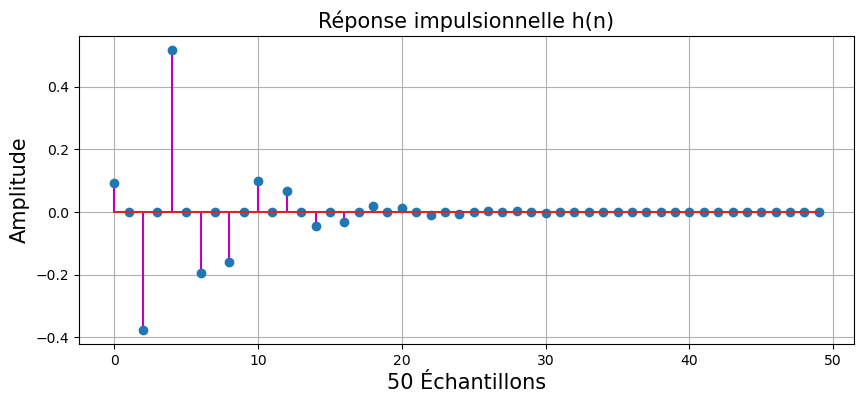

In [4]:
def impz(b, a):
    
    # Définir la séquence d'impulsion de longueur 50
    impulse = np.repeat(0., 50)
    impulse[0] = 1.  # La première valeur est 1, toutes les autres sont 0
    x = np.arange(0, 50)  # Créer un tableau de 50 valeurs pour l'axe des x
 
    # Calculer la réponse impulsionnelle
    # lfilter est une fonction qui applique un filtre digital à une séquence d'impulsion
    response_impulsionnelle = lfilter(b, a, impulse)
 
    # Tracer la réponse impulsionnelle du filtre
    fig = plt.figure(figsize=(10, 4))  
    plt.stem(x, response_impulsionnelle, 'm', use_line_collection=True)  # Tracer la réponse impulsionnelle
    plt.ylabel('Amplitude', fontsize=15)  
    plt.xlabel(r'50 Échantillons', fontsize=15)  
    plt.title(r'Réponse impulsionnelle h(n)', fontsize=15) 
    plt.grid(True)  

    plt.show()  # Afficher le graphique

    
impz(b, a)

## 5.Trace de la fonction de transfert $ H(f)$ .

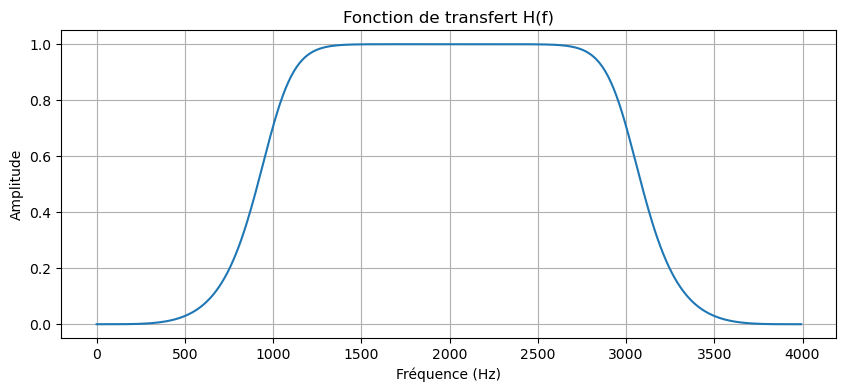

In [5]:
# Fonction de transfert H(f)
w, H = freqz(b, a, fs=fe)
plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(H))
plt.title('Fonction de transfert H(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## 6.La remarque sur l’allure de $H(f)$ lors de l’augmentation de l’ordre du filtre.

En augmentant l'ordre d'un filtre Butterworth, on observe une réduction de la largeur de la bande de transition (le passage de la bande passante vers la bande d'atténuation). Cela indique que le filtre devient plus "sélectif", c'est-à-dire qu'il devient plus efficace pour éliminer les fréquences en dehors de la bande passante spécifiée. Par conséquent, on peut dire que plus le filtre a un ordre élevé, plus sa fonction de transfert se rapproche de celle d'un filtre idéal, et par conséquent, il est considéré comme meilleur en termes de sélectivité et de capacité à atténuer les fréquences indésirables.

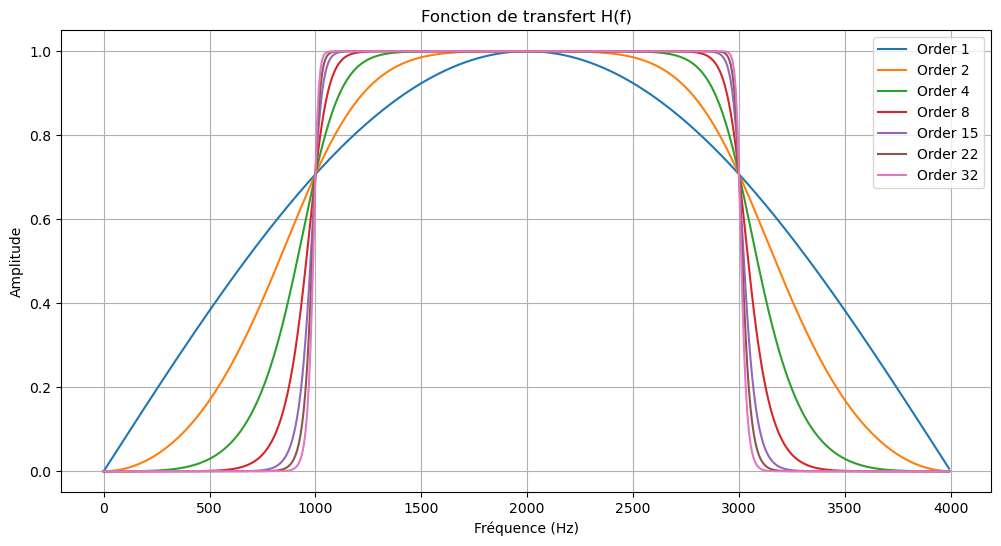

In [6]:
orders = [1,2, 4, 8, 15, 22, 32]
plt.figure(figsize=(12, 6))
for order in orders:
    b, a = Coefficients_ai_bi(order, fc1_normalisée, fc2_normalisée)
    w, h = freqz(b, a, fs=fe)
    plt.plot(w, np.abs(h), label=f'Order {order}')

plt.title('Fonction de transfert H(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Butterworth avec un ordre élevé

À ce stade, il est observé que l'augmentation significative du degré du filtre a des répercussions négatives sur sa qualité. En effet, cette augmentation de complexité peut introduire davantage de distorsion de phase dans le signal filtré. En conséquence, le filtre risque de devenir instable, c'est-à-dire que les pôles ne respectent plus la condition d'être strictement inférieurs au cercle unité.

Néanmoins, lorsque l’ordre du filtre est particulièrement élevé (plus de 39), des situations intéressantes se produisent :

- Certains ordres transforment le filtre en un filtre sélectif pour une seule fréquence.
- D’autres ordres rendent le filtre instable avec des amplitudes dépassant 1. Ainsi, pour certaines fréquences, le filtre sera sélectif mais aussi amplificateur.
- Enfin, lorsque l’ordre est extrêmement élevé, l’amplitude tend vers 0, ce qui signifie que le filtre supprime tout signal entrant.

Il est donc important de bien choisir l'ordre du filtre pour éviter les problèmes de stabilité qui pourraient compromettre son efficacité dans le traitement du signal.

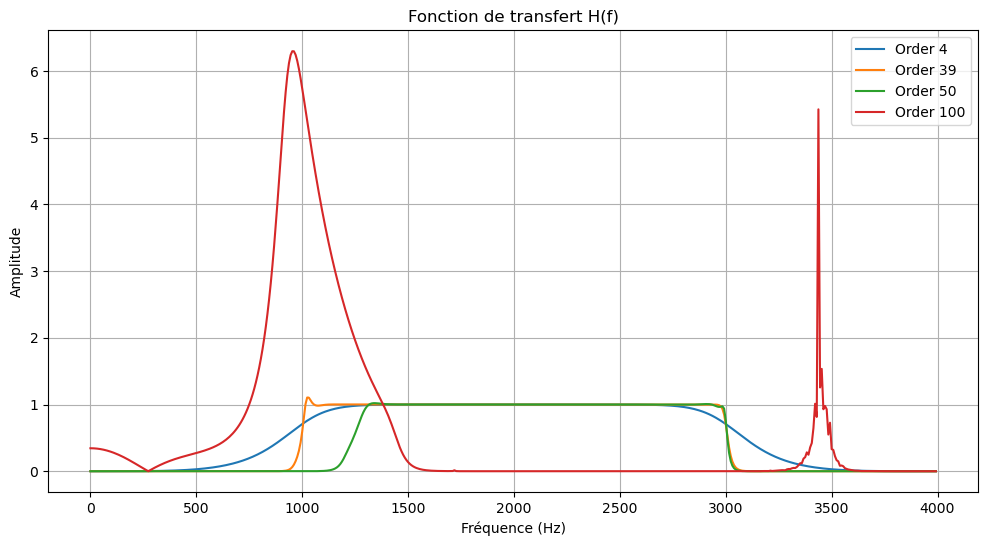

In [7]:
orders = [4,39,50,100]
plt.figure(figsize=(12, 6))
for order in orders:
    b, a = Coefficients_ai_bi(order, fc1_normalisée, fc2_normalisée)
    w, h = freqz(b, a, fs=fe)
    plt.plot(w, np.abs(h), label=f'Order {order}')

plt.title('Fonction de transfert H(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Exemple d'application sur un signal bruité

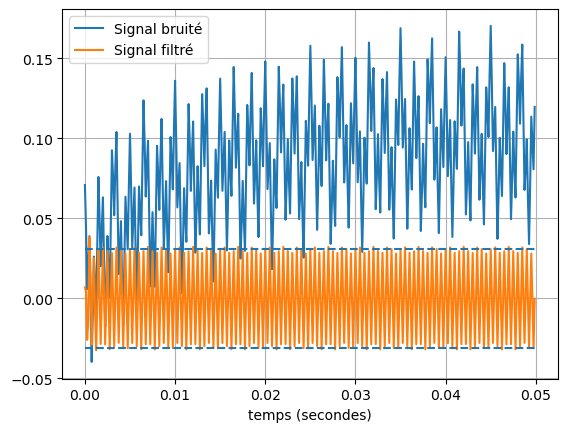

In [8]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter(order, [lowcut, highcut], fs=fs, btype='band')
    y = lfilter(b, a, data)
    return y

if __name__ == "__main__":

    # Taux d'échantillonnage et fréquences de coupure souhaitées (en Hz).
    fs = 8000.0
    lowcut = 1000.0
    highcut = 3000.0

    # Filtrer un signal bruité.
    T = 0.05
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    a = 0.031
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11) // bruit 
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Signal bruité')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=4)
    plt.plot(t, y, label='Signal filtré')
    plt.xlabel('temps (secondes)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()
